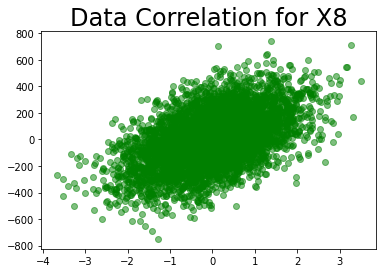

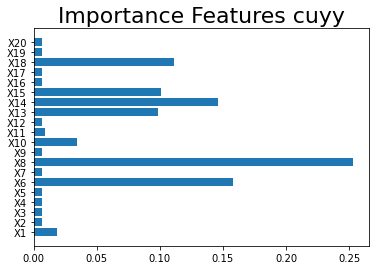

Linear Regression:  0.999993838046683
Score SVM:  0.4813352675090523
Score Random Forest:  0.9793666112945175
MAE: -0.398 (0.011)
MSE: -0.249 (0.014)


In [2]:
import pandas as pd
pd.set_option("display.max_columns", 25)
import matplotlib.pyplot as plt

data = pd.read_csv("datasetMidExamCOMP6577.csv")
# dengan menggunakan 'data kita bisa melihat seluruh data yang ada di dalam .csv'
data
# data.shape saya gunakan untuk melihat bentuk dari data itu, yang dimaksud dengan bentuk adalah jumlah array dari data akan seperti apa dan juga berapa kali berapa
data.shape
# data.describe() saya gunakan untuk melihat untuk melihat seluruh data secara detail untuk seluruh inputan data dan juga seluruh outputan
data.describe()

# dan untuk menjelaskan data yang memiliki korelasi terbesay untuk menghasilkan outputnya
# ini bertujuan untuk membuatkan data korelasi yang paling berperan untuk terciptanya output yang di inginkan dan saya juga sudah melakukan sorting dari yang paling besar
# ke paling kecil yang akan memudahkan saya dalam melakukan proses nantinya

# ini saya hanya memplot untuk melihat tingkat korelasi dalam bentuk suatu table diagram
plt.scatter(data['X8'], data['Y'], c='g', alpha=0.5)
plt.title("Data Correlation for X8", fontsize=24)
plt.show()

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# disini saya akan memisahkan data trainning atau data inputan dan juga data output(y)
X = data.drop(columns='Y')
y = data['Y']

#setelah terpisah, saya baru memtrainning menggunakan beberapa metode
LR = LinearRegression()
SVM = SVR()
RF = RandomForestRegressor()



# setelah saya menggunakan beberapa metode saya akan memfitnya ke dalam trainning dan juga sekaligus memprint data output terbaiknya, menggunakan metode yang mana
# jika kita mem-print .fit, maka kita bisa melihat berapa iterasi yang terjadi dan juga detail tentang proses trainning data yang tiap model lajkukan
LR.fit(X,y)
SVM.fit(X,y)
RF.fit(X,y)

# memudahkan kita untuk membuat graphic inputan yang lebih jelas untuk di lihat

importances = RF.feature_importances_
plt.barh(X.columns, importances)
plt.title("Importance Features cuyy", fontsize=22)
plt.show()

print("Linear Regression: ", LR.score(X, y))
print("Score SVM: ", SVM.score(X, y))
print("Score Random Forest: ", RF.score(X, y))

from sklearn import model_selection


kfold = model_selection.KFold(n_splits=10)
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(LR, X, y, cv=kfold, scoring=scoring)
print(("MAE: %.3f (%.3f)") % (results.mean(), results.std()))

scoring2 = 'neg_mean_squared_error'
results2 = model_selection.cross_val_score(LR, X, y, cv=kfold, scoring=scoring2)
print(("MSE: %.3f (%.3f)") % (results2.mean(), results2.std()))

